In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read csv into python
nasa = pd.read_csv('Meteorite_Landings.csv')

In [3]:
#Check out data
nasa.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [4]:
print(nasa.dtypes)

name            object
id               int64
nametype        object
recclass        object
mass (g)       float64
fall            object
year           float64
reclat         float64
reclong        float64
GeoLocation     object
dtype: object


In [5]:
print(nasa.nunique())

name           45716
id             45716
nametype           2
recclass         466
mass (g)       12576
fall               2
year             265
reclat         12738
reclong        14640
GeoLocation    17100
dtype: int64


In [6]:
#Check for any obvious outliers in year
nasa.id.groupby(nasa.year).count()

year
860.0        1
920.0        1
1399.0       1
1490.0       1
1491.0       1
          ... 
2010.0    1005
2011.0     713
2012.0     234
2013.0      11
2101.0       1
Name: id, Length: 265, dtype: int64

In [7]:
#Delete row with impossible year
delete_row_1 = nasa[nasa['year'] == 2101.0].index
nasa = nasa.drop(delete_row_1)

In [8]:
nasa.id.groupby(nasa.year).count()

year
860.0        1
920.0        1
1399.0       1
1490.0       1
1491.0       1
          ... 
2009.0    1497
2010.0    1005
2011.0     713
2012.0     234
2013.0      11
Name: id, Length: 264, dtype: int64

In [9]:
#Drop nan from year
#Can now use for questions about year
nasa_drop = nasa.dropna(axis=0, how='any').copy()

In [10]:
#Change the year column to int
nasa_drop.year = nasa_drop.year.astype(int)

In [11]:
nasa_drop.sort_values('year')

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
704,Nogata,16988,Valid,L6,472.0,Fell,860,33.72500,130.75000,"(33.725, 130.75)"
278,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,1399,50.18333,12.73333,"(50.18333, 12.73333)"
856,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,1490,45.48333,9.51667,"(45.48333, 9.51667)"
283,Ensisheim,10039,Valid,LL6,127000.0,Fell,1491,47.86667,7.35000,"(47.86667, 7.35)"
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,1575,-27.46667,-60.58333,"(-27.46667, -60.58333)"
...,...,...,...,...,...,...,...,...,...,...
30775,Northwest Africa 7856,57421,Valid,LL6,517.0,Found,2013,0.00000,0.00000,"(0.0, 0.0)"
30781,Northwest Africa 7863,57427,Valid,LL5,1000.0,Found,2013,0.00000,0.00000,"(0.0, 0.0)"
30780,Northwest Africa 7862,57426,Valid,L4/5,317.0,Found,2013,0.00000,0.00000,"(0.0, 0.0)"
30777,Northwest Africa 7858,57423,Valid,H4,459.0,Found,2013,0.00000,0.00000,"(0.0, 0.0)"


In [12]:
#Here is the percentage of meteorites that are found and that fell.
#This shows that a vast majority of meteorites were found and only a small amount were observed falling.
met_fell = nasa.id[nasa['fall'] == 'Fell'].count()
met_found = nasa.id[nasa['fall'] == 'Found'].count()
percent_met_fell = round((met_fell / nasa.id.count()) * 100, 2)
percent_met_found = round((met_found / nasa.id.count()) * 100, 2)
print('The percent of meteorites that fell is ' + str(percent_met_fell) + '%.')
print('The percent of meteorites that are found is ' + str(percent_met_found) + '%.')

The percent of meteorites that fell is 2.42%.
The percent of meteorites that are found is 97.58%.


In [13]:
#This data shows that on average more meteorites fell in the past and a lot more are being found now.
#This makes sense with the percentage of meteorites that fell and were found.  The meteorites are found so much more often that
#it influences the average to a greater extent.
average_year = round(nasa_drop.year.mean())
print('The average year that a meteorite falls or is found is ' + str(average_year) + '.')
average_year_fell = round(nasa_drop.year[nasa['fall'] == 'Fell'].mean())
print('The average year that a meteorite falls is ' + str(average_year_fell) + '.')
average_year_found = round(nasa_drop.year[nasa['fall'] == 'Found'].mean())
print('The average year that a meteorite is found is ' + str(average_year_found) + '.')

The average year that a meteorite falls or is found is 1990.
The average year that a meteorite falls is 1914.
The average year that a meteorite is found is 1992.


In [14]:
#Gives the most common years for meteorites to fall or be found.
print(nasa_drop.id.groupby(nasa_drop.year).count().reset_index(name='Count').sort_values(['Count'], ascending=False).reset_index(drop=True).to_string())

     year  Count
0    1979   3045
1    1988   2295
2    1998   2147
3    2003   1754
4    2006   1616
5    1999   1592
6    1990   1506
7    1997   1505
8    2000   1502
9    2009   1496
10   1986   1374
11   2001   1339
12   2002   1066
13   2007   1038
14   2010   1005
15   1993    976
16   2008    936
17   1987    914
18   1991    869
19   1994    717
20   2011    713
21   1974    691
22   1996    573
23   1995    484
24   1981    458
25   1977    420
26   1984    402
27   1985    377
28   1992    372
29   2004    366
30   1983    359
31   1982    344
32   1975    336
33   2005    328
34   1978    260
35   2012    234
36   1980    143
37   1989    135
38   1969     67
39   1968     52
40   1937     52
41   1976     50
42   1971     47
43   1965     46
44   1970     46
45   1938     44
46   1940     37
47   1950     36
48   1962     36
49   1936     35
50   1967     34
51   1963     33
52   1939     32
53   1964     31
54   1972     31
55   1933     30
56   1973     29
57   1961     

In [15]:
#These are the most common years where meteorites fell.
#These tend to be much farther in the past than the meteorites that are found.
print(nasa_drop.id[nasa_drop['fall'] == 'Fell'].groupby(nasa_drop.year).count().reset_index(name='Count').sort_values(['Count'], ascending=False).reset_index(drop=True).to_string())

     year  Count
0    1933     17
1    1949     12
2    1938     11
3    1950     11
4    1930     11
5    1868     11
6    1916     10
7    1977     10
8    1934     10
9    1984     10
10   1924     10
11   1917     10
12   1976     10
13   1910     10
14   1939     10
15   1890      9
16   2008      9
17   1986      9
18   2003      9
19   1998      9
20   1932      8
21   1956      8
22   1897      8
23   1921      8
24   1879      8
25   1942      8
26   1970      8
27   1900      8
28   1903      8
29   2007      8
30   2002      8
31   1919      7
32   1877      7
33   1902      7
34   1880      7
35   1869      7
36   1866      7
37   1899      7
38   1865      7
39   1906      7
40   1857      7
41   1929      7
42   1926      7
43   1925      7
44   1914      7
45   1981      7
46   1962      7
47   1974      7
48   1971      7
49   1999      7
50   1886      7
51   1961      7
52   1963      7
53   1967      7
54   1990      7
55   1994      6
56   1923      6
57   1922     

In [16]:
#These are the most common years that a meteorite was found.
#These tend to be much more recent than the meteorites that fell.
print(nasa_drop.id[nasa_drop['fall'] == 'Found'].groupby(nasa_drop.year).count().reset_index(name='Count').sort_values(['Count'], ascending=False).reset_index(drop=True).to_string())

     year  Count
0    1979   3043
1    1988   2289
2    1998   2138
3    2003   1745
4    2006   1611
5    1999   1585
6    1997   1502
7    2000   1499
8    1990   1499
9    2009   1491
10   1986   1365
11   2001   1334
12   2002   1058
13   2007   1030
14   2010    999
15   1993    972
16   2008    927
17   1987    913
18   1991    864
19   1994    711
20   2011    709
21   1974    684
22   1996    568
23   1995    479
24   1981    451
25   1977    410
26   1984    392
27   1985    375
28   1992    369
29   2004    360
30   1983    355
31   1982    341
32   1975    332
33   2005    328
34   1978    257
35   2012    232
36   1980    137
37   1989    129
38   1969     61
39   1968     47
40   1937     46
41   1965     42
42   1976     40
43   1971     40
44   1970     38
45   1938     33
46   1940     32
47   1936     30
48   1962     29
49   1972     28
50   1967     27
51   1973     26
52   1963     26
53   1950     25
54   1964     25
55   1939     22
56   1960     22
57   1961     

In [17]:
#Relict versus valid
met_valid = nasa.id[nasa['nametype'] == 'Valid'].count()
met_valid

45640

In [18]:
met_relict = nasa.id[nasa['nametype'] == 'Relict'].count()
met_relict

75

In [19]:
#Percentages of valid and relict
total_nametype = nasa.nametype.count()
valid_percent = round((met_valid / total_nametype) * 100, 2)
relict_percent = round((met_relict / total_nametype) * 100, 2)
print(valid_percent)
print(relict_percent)

99.84
0.16


In [20]:
#Start exploring mass of meteorites
average_mass = round(nasa['mass (g)'].mean(), 2)
print('The average mass of a meteorite is ' + str(average_mass) + 'g.')

The average mass of a meteorite is 13278.37g.


In [21]:
print(nasa.id.groupby(nasa['mass (g)']).count().reset_index(name='Count').sort_values(['mass (g)'], ascending=False).reset_index().to_string())

       index      mass (g)  Count
0      12575  6.000000e+07      1
1      12574  5.820000e+07      1
2      12573  5.000000e+07      1
3      12572  3.000000e+07      1
4      12571  2.800000e+07      1
5      12570  2.600000e+07      1
6      12569  2.430000e+07      1
7      12568  2.400000e+07      1
8      12567  2.300000e+07      1
9      12566  2.200000e+07      1
10     12565  1.600000e+07      1
11     12564  1.550000e+07      1
12     12563  1.010000e+07      1
13     12562  9.500000e+06      1
14     12561  8.600000e+06      1
15     12560  7.000000e+06      1
16     12559  5.360000e+06      1
17     12558  4.300000e+06      1
18     12557  4.000000e+06      1
19     12556  3.828000e+06      1
20     12555  3.800000e+06      1
21     12554  3.000000e+06      4
22     12553  2.753000e+06      1
23     12552  2.550000e+06      1
24     12551  2.300000e+06      1
25     12550  2.184000e+06      1
26     12549  2.100000e+06      1
27     12548  2.000000e+06      5
28     12547  

In [22]:
#Explore relationship between mass and year
#Drop outliers in mass and year
nasa_drop_mass = nasa_drop[nasa_drop['mass (g)'] < 1000000]
nasa_drop_mass = nasa_drop_mass[nasa_drop_mass['year'] > 1600]

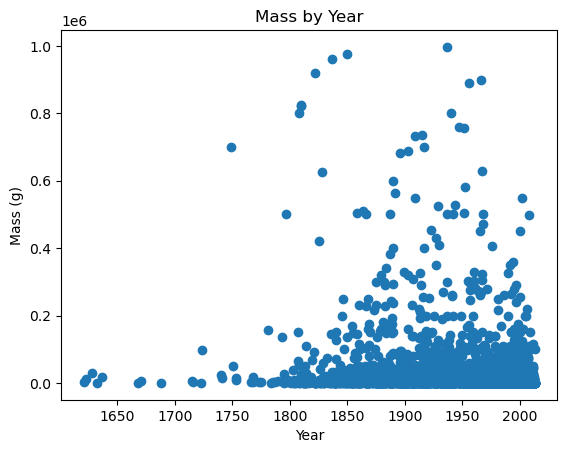

In [23]:
#Made a scatter plot to show the general trend of mass vs year
plt.scatter(nasa_drop_mass.year, nasa_drop_mass['mass (g)'])
plt.xlabel('Year')
plt.ylabel('Mass (g)')
plt.title('Mass by Year')
plt.show()

In [24]:
corr_matrix = nasa_drop_mass.corr()
print(corr_matrix)

                id  mass (g)      year    reclat   reclong
id        1.000000 -0.045381  0.368589  0.268644 -0.336665
mass (g) -0.045381  1.000000 -0.250275  0.126387 -0.080363
year      0.368589 -0.250275  1.000000 -0.100702  0.089861
reclat    0.268644  0.126387 -0.100702  1.000000 -0.593321
reclong  -0.336665 -0.080363  0.089861 -0.593321  1.000000


In [25]:
#It appears that there is a slight negative correlation between mass and year.  This could be because so many more meteorites
#are found, and a large amount of those are smaller.

In [26]:
#Here is the average mass for meteorites that fell.
nasa_mass_fell = nasa[nasa['fall'] == 'Fell']
met_fell_avg = nasa_mass_fell['mass (g)'].mean()
print(met_fell_avg)

47070.7150232558


In [27]:
#Here is the average mass for meteorites that are found.
nasa_mass_found = nasa[nasa['fall'] == 'Found']
met_found_avg = nasa_mass_found['mass (g)'].mean()
print(met_found_avg)

12462.201734211067


In [31]:
#Sorting by mass
nasa.sort_values(by='mass (g)', ascending=False, inplace=True)

In [34]:
nasa['rank'] = range(1, len(nasa)+1)

In [36]:
nasa.to_csv('Meteorite_Landings_Sorted.csv', index=False)